In [1]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd

warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [3]:
from models import Poisson_Model, SVM_Model, Logistic_Regression_Model

In [4]:
independent_features = ['home_team_id', 'away_team_id', 'home_team_attack_strength',
    'away_team_attack_strength', 'home_team_defence_strength', 'away_team_defence_strength'
    ]
dependent_features = 'FTR_Encode'
results = {}
for year in range(2019, 2024):    
    print(f"{year} FIFA Season: ")
    results[year] = {}
    path = f"data/international_league_{year}_svm.csv"
    data = pd.read_csv(path)
    data = data.dropna()

    # Poisson Model (2 methods)
    "Average_Goals_as_Money_Line"
    "Point_Spread_as_Money_Line"
    "Point_Spread_Predicts_Score"
    results_poisson = Poisson_Model.validation_by_season(data= pd.read_csv(path))
    results[year].update(results_poisson)
    
    # Support Vector Machine
    svm_predictor = SVM_Model(df=data)
    svm_predictor.train_test_split(independent_features, dependent_features)
    svm_predictor.train_model()
    "SVM_Money_Line_Accuracy"
    results_svm = svm_predictor.validate()
    results[year].update(results_svm)
    
    # Regression
    lrm = LogisticRegressionModel(df=data)    
    lrm.train_test_split(independent_features,dependent_features)
    lrm.train()
    lrm.predict_x_test()
    "LR_Money_Line_Accuracy"
    results_lrm = lrm.validate_x_test()
    results[year].update(results_lrm)
    # break
    
results_df = pd.DataFrame(results).transpose() 

2019 FIFA Season: 
Poisson Average Goals scored to predict ML: 51.089%
Poisson pmf pointspread to predict ML: 48.561%
Poisson pmf predicts exact match score: 6.6259%
SVM predicts correct moneyline: 0.491%
Logistic Regression predicts correct Money Line 48.21%
2020 FIFA Season: 
Poisson Average Goals scored to predict ML: 55.619%
Poisson pmf pointspread to predict ML: 56.195%
Poisson pmf predicts exact match score: 14.121%
SVM predicts correct moneyline: 0.427%
Logistic Regression predicts correct Money Line 45.83%
2021 FIFA Season: 
Poisson Average Goals scored to predict ML: 47.713%
Poisson pmf pointspread to predict ML: 44.932%
Poisson pmf predicts exact match score: 4.5739%
SVM predicts correct moneyline: 0.489%
Logistic Regression predicts correct Money Line 46.22%
2022 FIFA Season: 
Poisson Average Goals scored to predict ML: 48.710%
Poisson pmf pointspread to predict ML: 46.026%
Poisson pmf predicts exact match score: 9.7007%
SVM predicts correct moneyline: 0.5%
Logistic Regressi

In [5]:
results_df = pd.DataFrame(results).transpose() 
results_df

,Poisson_Average_Goals_as_Money_Line,Poisson_Point_Spread_as_Money_Line,Poisson_Point_Spread_Predicts_Score,SVM_Money_Line_Accuracy,LR_Money_Line_Accuracy
2019,0.510898,0.485615,0.066260,0.491071,0.482143
2020,0.556196,0.561960,0.141210,0.427083,0.458333
2021,0.477130,0.449327,0.045740,0.489426,0.462236
2022,0.487100,0.460268,0.097007,0.500000,0.297872
2023,0.540797,0.515180,0.074004,0.500000,0.336538


# vizualize model perfs

Performance of Money Line bets

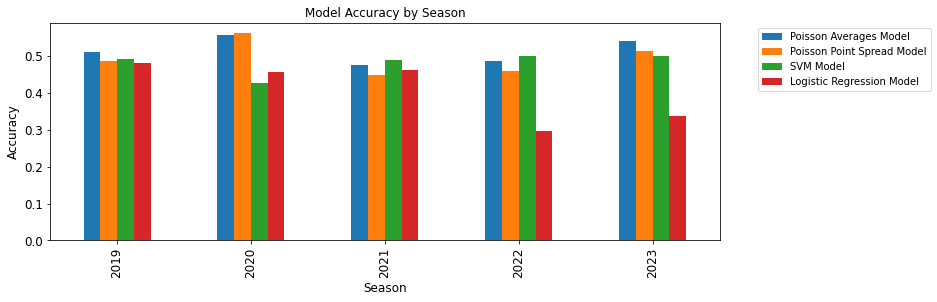

In [6]:
import matplotlib.pyplot as plt

# for readability
results_df.rename(columns = {
    'Poisson_Average_Goals_as_Money_Line': 'Poisson Averages Model',
    'Poisson_Point_Spread_as_Money_Line': 'Poisson Point Spread Model', 
    'SVM_Money_Line_Accuracy': 'SVM Model', 
    'LR_Money_Line_Accuracy': 'Logistic Regression Model'  
    }, inplace = True)

ax = results_df[['Poisson Averages Model','Poisson Point Spread Model', 
                 'SVM Model', 'Logistic Regression Model']
               ].plot(kind='bar', title ="Model Accuracy by Season", figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel("Season", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

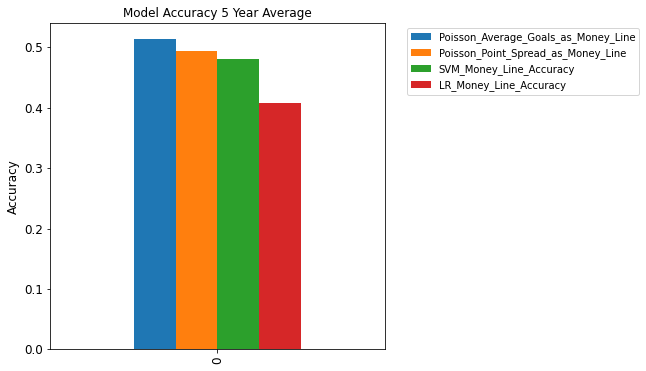

In [7]:
results_df = pd.DataFrame(results).transpose().drop(['Poisson_Point_Spread_Predicts_Score'],axis=1)
ax = pd.DataFrame([results_df[:].sum().values[:] / results_df.shape[0]], 
    columns=['Poisson_Average_Goals_as_Money_Line',
    'Poisson_Point_Spread_as_Money_Line', 
    'SVM_Money_Line_Accuracy',
    'LR_Money_Line_Accuracy']).plot(kind='bar', title ="Model Accuracy 5 Year Average", figsize=(6, 6), legend=True, fontsize=12)

ax.set_ylabel("Accuracy", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

In [8]:
result_df = pd.DataFrame(results).transpose() 
for col in result_df.columns[:]:
    average_accuracy_percentage = result_df[col].sum() / results_df.shape[0] 
    print(f"{col}: {average_accuracy_percentage} avg")

Poisson_Average_Goals_as_Money_Line: 0.5144242144351846 avg
Poisson_Point_Spread_as_Money_Line: 0.49447004777036796 avg
Poisson_Point_Spread_Predicts_Score: 0.08484422243151699 avg
SVM_Money_Line_Accuracy: 0.4815161487555747 avg
LR_Money_Line_Accuracy: 0.40742452839740234 avg


predicted correct point spread 8.4844%